#additional analyses

email subscriptions

In [ ]:
# packages
import pandas as pd
import numpy as np
from plotnine import *

from sklearn import tree

In [ ]:
import graphviz

In [ ]:
data = pd.read_csv("https://github.com/connoralydon/rosetta_stone_final/raw/main/data/rosetta_stone_clean.csv")
data = data.drop(columns=["subscription_start_date","language","country"])
data = pd.get_dummies(data)
data.head()

,Unnamed: 0,demo_user,free_trial_user,auto_renew,email_subscriber,push_notifications,send_count,unique_open_count,unique_click_count,purchase_amount_usd,...,purchase_amount_usd_imputed,subscription_event_type_INITIAL_PURCHASE,subscription_event_type_RENEWAL,purchase_store_App,purchase_store_Web,user_type_Consumer,user_type_Other,lead_platform_App,lead_platform_Unknown,lead_platform_Web
0,0,True,False,False,True,True,63.0,6.0,0.0,NaN,...,10.064357,1,0,1,0,1,0,1,0,0
1,1,False,False,False,False,True,4.0,1.0,0.0,39.0,...,39.000000,1,0,0,1,1,0,0,0,1
2,2,False,False,False,True,True,1.0,0.0,0.0,0.0,...,0.000000,1,0,0,1,1,0,0,0,1
3,3,True,False,False,True,True,14.0,0.0,0.0,NaN,...,13.975346,1,0,1,0,1,0,1,0,0
4,4,False,False,False,True,True,80.0,5.0,1.0,NaN,...,6.399365,1,0,1,0,1,0,0,0,1


In [ ]:
for col in data.columns:
  print(col)

Unnamed: 0
demo_user
free_trial_user
auto_renew
email_subscriber
push_notifications
send_count
unique_open_count
unique_click_count
purchase_amount_usd
subscription_length_days
subscription_type_lifetime
subscription_type_limited
total_app_interactions
launch_app_interactions
purchase_amount_usd_imputed
subscription_event_type_INITIAL_PURCHASE
subscription_event_type_RENEWAL
purchase_store_App
purchase_store_Web
user_type_Consumer
user_type_Other
lead_platform_App
lead_platform_Unknown
lead_platform_Web


In [ ]:
data["demo_user"] = data["demo_user"].astype(bool)
data["free_trial_user"] = data["free_trial_user"].astype(bool)
data["auto_renew"] = data["auto_renew"].astype(bool)
data["email_subscriber"] = data["email_subscriber"].astype(bool)
data["push_notifications"] = data["push_notifications"].astype(bool)
data["subscription_type_lifetime"] = data["subscription_type_lifetime"].astype(bool)
data["subscription_type_limited"] = data["subscription_type_limited"].astype(bool)
data["subscription_event_type_INITIAL_PURCHASE"] = data["subscription_event_type_INITIAL_PURCHASE"].astype(bool)
data["subscription_event_type_RENEWAL"] = data["subscription_event_type_RENEWAL"].astype(bool)
data["purchase_store_App"] = data["purchase_store_App"].astype(bool)
data["purchase_store_Web"] = data["purchase_store_Web"].astype(bool)
data["user_type_Consumer"] = data["user_type_Consumer"].astype(bool)
data["user_type_Other"] = data["user_type_Other"].astype(bool)
data["lead_platform_App"] = data["lead_platform_App"].astype(bool)
data["lead_platform_Unknown"] = data["lead_platform_Unknown"].astype(bool)
data["lead_platform_Web"] = data["lead_platform_Web"].astype(bool)

columns that don't seem too useful are date. we previously found that date doesn't significantly impact the sales.

In [ ]:
# rows that are subscription_type_limited

data["long_term"] = data["subscription_length_days"] > 420
data = data[data["subscription_type_limited"] == 1]

long_term = "long_term"
renewal = "subscription_event_type_RENEWAL"

features = ["demo_user",
            "free_trial_user",
            "purchase_store_App",
            "email_subscriber",
            "push_notifications"]

data["subscription_type_lifetime"].sum()

0

In [111]:
data["long_term"].sum()

3473

In [ ]:
# decision tree
long_term_tree = tree.DecisionTreeClassifier(max_depth=2)
long_term_tree = long_term_tree.fit(data[features],data[long_term])

# tree.plot_tree(long_term_tree, 
#                feature_names=features, 
#                filled=True,
#                impurity = True)

long_data = tree.export_graphviz(long_term_tree, out_file=None,
                                 feature_names=features, 
                                 filled=True,
                                 impurity = True,
                                 rounded=True,
                                 class_names=long_term,
                                 precision=2,
                                 proportion=True) 
long_graph = graphviz.Source(long_data) 
long_graph.render("long_graph")


# long_term_text_plot = tree.export_text(long_term_tree, feature_names=features)
# long_term_text_plot

'long_graph.pdf'

In [ ]:
renewal_tree = tree.DecisionTreeClassifier(max_depth=2)
renewal_tree = renewal_tree.fit(data[features],data[renewal])

renewal_data = tree.export_graphviz(renewal_tree, out_file=None,
                                 feature_names=features, 
                                 filled=True,
                                 impurity = True,
                                 rounded=True,
                                 class_names=renewal,
                                 precision=2,
                                 proportion=True) 
renewal_graph = graphviz.Source(renewal_data) 
renewal_graph.render("renewal_graph")

# renewal_text_plot = tree.export_text(renewal_tree, feature_names=features)
# renewal_text_plot

'renewal_graph.pdf'

[Text(0.5, 0.8333333333333334, 'X[2] <= 0.5\ngini = 0.43\nsamples = 33557\nvalue = [23047, 10510]'),
 Text(0.25, 0.5, 'X[4] <= 0.5\ngini = 0.324\nsamples = 19858\nvalue = [15817, 4041]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.35\nsamples = 8528\nvalue = [6602, 1926]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.304\nsamples = 11330\nvalue = [9215, 2115]'),
 Text(0.75, 0.5, 'X[1] <= 0.5\ngini = 0.498\nsamples = 13699\nvalue = [7230, 6469]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 10506\nvalue = [6558, 3948]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.332\nsamples = 3193\nvalue = [672, 2521]')]

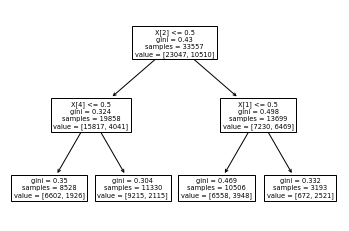

In [114]:
tree.plot_tree(renewal_tree)

as seen in avivs work, there is a big difference between the sum of the purchases and the averages. The sum of long terms subs >420 days. They make a lot of renewal purchases and spend a lot of money on the platform. While lifetime purchases bring in more money, they don't focus on the product. This can lead to Rosetta Stone becoming lazy and not developing the product. Renewal subscribers are constantly driven to use the product and drive the platform to become better. Rarely do we see lifetime subscribers using the app a lot

In [ ]:
np.corrcoef(data["purchase_amount_usd_imputed"],data["subscription_length_days"])

array([[1.        , 0.78130992],
       [0.78130992, 1.        ]])

In [ ]:
np.corrcoef(data["purchase_amount_usd_imputed"],data["total_app_interactions"])

array([[1.        , 0.01233523],
       [0.01233523, 1.        ]])

In [ ]:
np.corrcoef(data["purchase_amount_usd_imputed"],data["unique_click_count"])

array([[1.        , 0.23263221],
       [0.23263221, 1.        ]])